# Example of using sklearn and model_metadata

This uses sklearn and a simple Linear Regression model and the Iris dataset to show you how the tool can be used.

In [3]:
import time
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import random
from model_metadata.uploader import MetadataUploader

In [4]:
# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()

In [6]:
# Time the training process
start_train_time = time.time()
model.fit(X_train, y_train)
end_train_time = time.time()
train_time = end_train_time - start_train_time

In [7]:
# Time the prediction process
start_pred_time = time.time()
y_pred = model.predict(X_test)
end_pred_time = time.time()
pred_time = end_pred_time - start_pred_time

In [8]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

Above is standard sklearn code. Below is how you log some of the information anove using model_metadata...

In [10]:
# Initialize MetricsUploader with team name, project name and run name
metup = MetadataUploader(team='Example', experiment='Example', run_name='Example')

# Upload evaluation metrics to Athena
metup.log_metric('mean_squared_error', mse)
metup.log_metric('mean_absolute_error', mae)

# Upload params to Athena
metup.log_param('test_size', 0.2)
metup.log_param('random_state', 42)

# Upload timing metrics to Athena
metup.log_measurement('training_time', train_time)
metup.log_measurement('prediction_time', pred_time)

Let's see how this looks in Athena for the metrics

In [14]:
import pydbtools as pydb

query = f"SELECT * FROM model_metadata.metrics WHERE team = 'Example' and experiment = 'Example' and run_name = 'Example'"

# Fetch data from Athena using pydbtools
df = pydb.read_sql_query(query)
df

,team,experiment,run_name,metric,value,timestamp,table
0,Example,Example,Example,mean_squared_error,0.037114,2024-05-22 10:24:27.573,metrics
1,Example,Example,Example,mean_absolute_error,0.146377,2024-05-22 10:24:27.573,metrics


This is then observable at the front end...

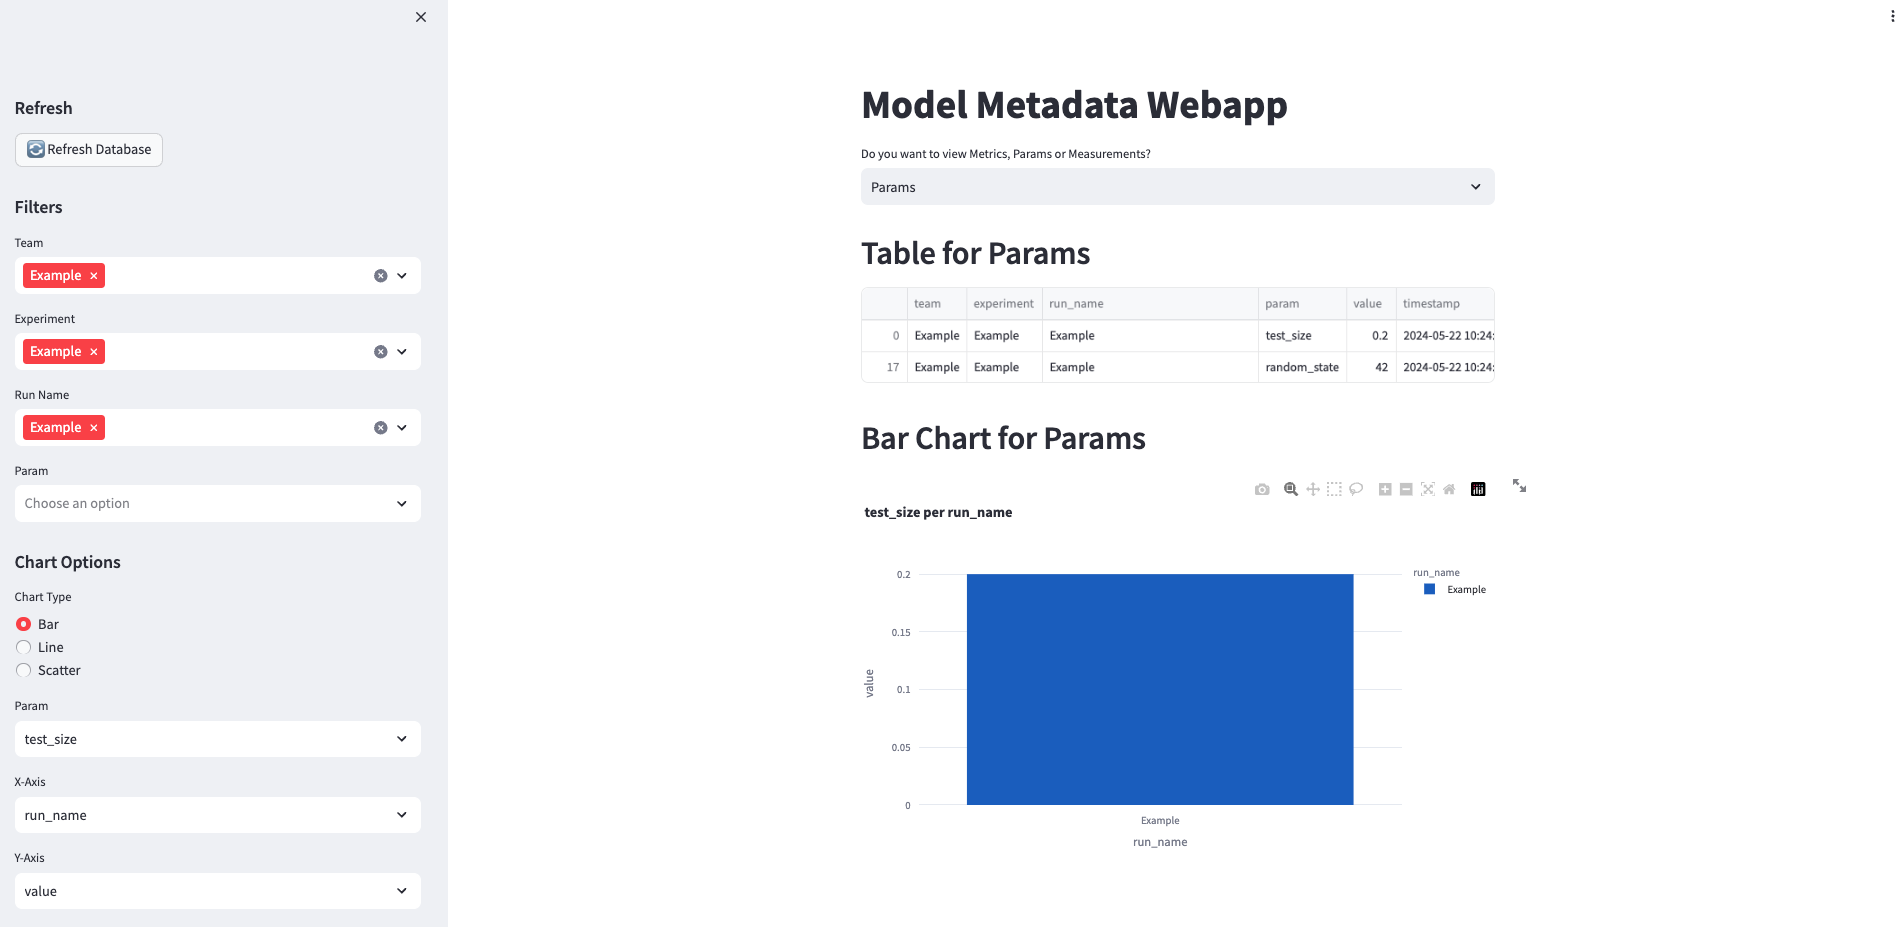